# **Função de Autocorrelação Parcial (FAP)**

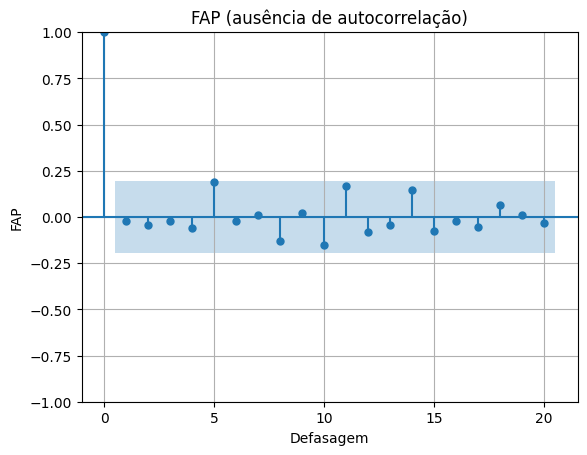

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf

# Criando dados de exemplo (substitua isso pelos seus dados reais)
np.random.seed(42)
n = 100
residuals = np.random.normal(0, 1, n)

# Calculando a FAP
lags = 20  # Número de defasagens para incluir no gráfico da FAP
plot_pacf(residuals, lags=lags, title='FAP (ausência de autocorrelação)')

# Personalizando o gráfico (opcional)
plt.xlabel('Defasagem')
plt.ylabel('FAP')
plt.grid()

# Exibindo o gráfico
plt.show()

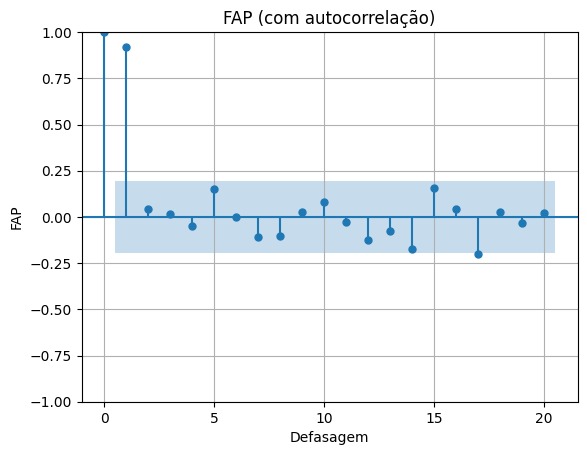

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf

# Simulação de dados com autocorrelação parcial
np.random.seed(42)
n = 100
phi = 0.99  # Parâmetro de autocorrelação parcial
residuals = np.random.normal(0, 1, n)
for t in range(1, n):
    residuals[t] = phi * residuals[t - 1] + np.random.normal(0, 1)

# Calculando a FAP
lags = 20  # Número de defasagens para incluir no gráfico da FAP
plot_pacf(residuals, lags=lags, title='FAP (com autocorrelação)')

# Personalizando o gráfico (opcional)
plt.xlabel('Defasagem')
plt.ylabel('FAP')
plt.grid()

# Exibindo o gráfico
plt.show()


# **DW test: y = 2x<sub>1</sub> + 3x<sub>2</sub> + e**

In [ ]:
import numpy as np
import statsmodels.api as sm

# Ajustando um modelo de regressão fictício (substitua pelos seus dados reais)
X = np.random.rand(n, 2)
X = sm.add_constant(X)  # Adicionando uma constante para o termo de interceptação
y = 2 * X[:, 0] + 3 * X[:, 1] + residuals

# Ajustando o modelo de regressão linear
model = sm.OLS(y, X).fit()

# Calculando a estatística de Durbin-Watson
dw_statistic = sm.stats.stattools.durbin_watson(model.resid)

# Exibindo o resultado
print(f"Estatística de Durbin-Watson: {dw_statistic:.2f}")


Estatística de Durbin-Watson: 0.26


# ** Breusch & Godfrey test**

In [ ]:
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_breusch_godfrey

# Calculando as autocorrelações dos resíduos
max_lag = 4  # Escolha o número máximo de defasagens para o teste
acf_resid = sm.tsa.acf(model.resid, nlags=max_lag)

# Realizando o Teste de Breusch-Godfrey
results = acorr_breusch_godfrey(model, nlags=max_lag)
print("Resultado do Teste de Breusch-Godfrey:")
print(f"Valor de estatística do teste: {results[0]:.4f}")
print(f"Valor p: {results[1]:.4f}")

Resultado do Teste de Breusch-Godfrey:
Valor de estatística do teste: 81.0144
Valor p: 0.0000


# **Exercícios**

Verifique se há autocorrelação dos residuos usando os dados em dados_autocorr.parquet

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_breusch_godfrey

dados = pd.read_parquet("dados_autocorr.parquet")

X = dados['X']
y = dados['y']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

# Calculando a estatística de Durbin-Watson
dw_statistic = sm.stats.stattools.durbin_watson(model.resid)

# Exibindo o resultado
print(f"Estatística de Durbin-Watson: {dw_statistic:.2f}")

# Calculando as autocorrelações dos resíduos
max_lag = 20  # Escolha o número máximo de defasagens para o teste
acf_resid = sm.tsa.acf(model.resid, nlags=max_lag)

# Realizando o Teste de Breusch-Godfrey
results = acorr_breusch_godfrey(model, nlags=max_lag)
print("Resultado do Teste de Breusch-Godfrey:")
print(f"Valor de estatística do teste: {results[0]:.4f}")
print(f"Valor p: {results[1]:.4f}")



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     31.86
Date:                Wed, 04 Oct 2023   Prob (F-statistic):           1.61e-07
Time:                        23:17:49   Log-Likelihood:                -142.41
No. Observations:                 100   AIC:                             288.8
Df Residuals:                      98   BIC:                             294.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9674      0.207     -4.667      0.0

# **Estacionalidade**

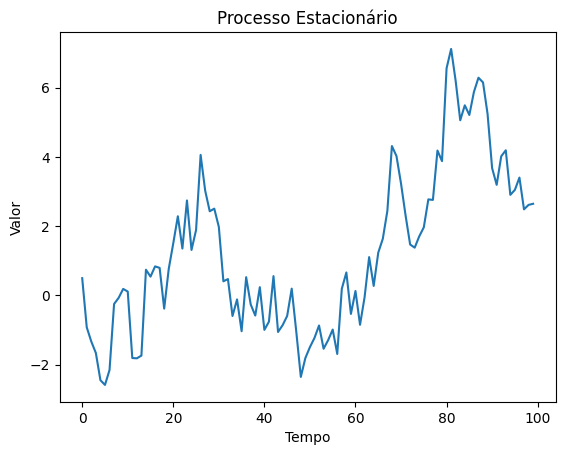

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Plotar o processo estocástico estacionário
plt.plot(residuals)
# plt.plot(np.cumsum(1+residuals))
plt.title("Processo Estacionário")
plt.xlabel("Tempo")
plt.ylabel("Valor")
plt.show()


# **MA(1)**

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -133.805
Date:                Wed, 04 Oct 2023   AIC                            275.611
Time:                        23:58:18   BIC                            286.032
Sample:                             0   HQIC                           279.828
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8120      0.128     14.146      0.000       1.561       2.063
ma.L1          0.4716      0.102      4.610      0.000       0.271       0.672
ma.L2         -0.0963      0.124     -0.780      0.4

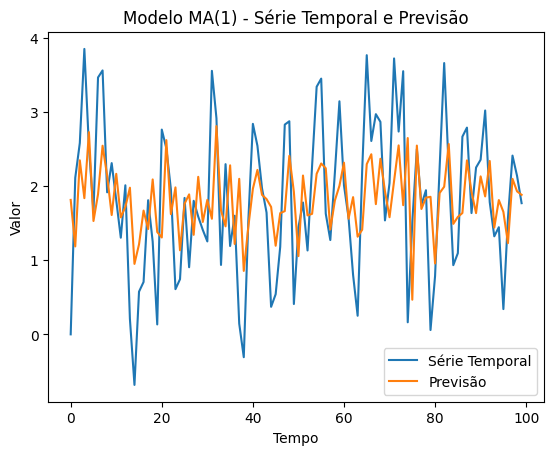

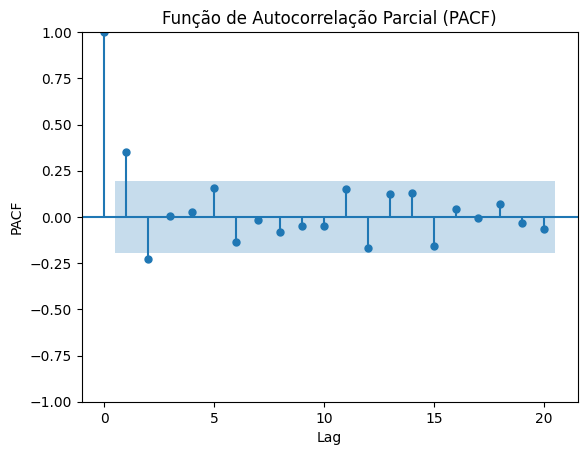

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Simulação de uma série temporal MA(1)
np.random.seed(42)
n = 100
mu = 2  # Média
theta1 = 0.5  # Coeficiente MA(1)
sigma = 1.0  # Desvio padrão do ruído branco

# Gerar o ruído branco
erro = np.random.normal(0, sigma, n)

# Inicializar a série temporal
y = np.zeros(n)

# Gerar a série temporal MA(1)
for t in range(1, n):
    y[t] = mu + theta1 * erro[t-1] + erro[t]

# Ajustar o modelo MA(1)
model = sm.tsa.ARIMA(y, order=(0, 0, 2))
results = model.fit()

# Resumo do modelo
print(results.summary())

# Gráfico da série temporal e da previsão
plt.plot(y, label='Série Temporal')
plt.plot(results.fittedvalues, label='Previsão')
plt.legend()
plt.title('Modelo MA(1) - Série Temporal e Previsão')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.show()

plot_pacf(y, lags=20, title='Função de Autocorrelação Parcial (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()


# **MA(2)**

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Simulação de uma série temporal MA(2)
np.random.seed(42)
n = 100
mu = 2  # Média
theta1 = 0.5  # Coeficiente MA(1)
theta2 = -0.3  # Coeficiente MA(2)
sigma = 1.0  # Desvio padrão do ruído branco

# Gerar o ruído branco
epsilon = np.random.normal(0, sigma, n)

# Inicializar a série temporal
y = np.zeros(n)

# Gerar a série temporal MA(2)
for t in range(2, n):
    y[t] = mu + theta1 * epsilon[t-1] + theta2 * epsilon[t-2] + epsilon[t]

# Ajustar o modelo MA(2)
model = sm.tsa.ARIMA(y, order=(0, 0, 2))
results = model.fit()

# Resumo do modelo
print(results.summary())

# # Gráfico da série temporal e da previsão
# plt.plot(y, label='Série Temporal')
# plt.plot(results.fittedvalues, label='Previsão')
# plt.legend()
# plt.title('Modelo MA(2) - Série Temporal e Previsão')
# plt.xlabel('Tempo')
# plt.ylabel('Valor')
# plt.show()

# plot_pacf(y, lags=20, title='Função de Autocorrelação Parcial (PACF)')
# plt.xlabel('Lag')
# plt.ylabel('PACF')
# plt.show()

# ma(1) -> AIC = 286.317
# ma(2) -> AIC = 273.521*
# ma(3) -> AIC = 275.418
# ma(4) -> AIC = 276.588


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -132.760
Date:                Thu, 05 Oct 2023   AIC                            273.521
Time:                        00:04:06   BIC                            283.942
Sample:                             0   HQIC                           277.738
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8344      0.099     18.518      0.000       1.640       2.029
ma.L1          0.4875      0.087      5.579      0.000       0.316       0.659
ma.L2         -0.4126      0.100     -4.124      0.0

# **Qual é o melhor modelo de média móvel para a série presente em ma_exercicio.parquet?**

In [ ]:
dados = pd.read_parquet("ma_exercicio.parquet")
y = dados['y']

# Ajustar o modelo MA(2)
model = sm.tsa.ARIMA(y, order=(0, 0, 2))
results = model.fit()

# Resumo do modelo
print(results.summary())

#ma(1) -> AIC = 294.621
#ma(2) -> AIC = 271.264
#ma(3) -> AIC = 273.262

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -131.632
Date:                Thu, 05 Oct 2023   AIC                            271.264
Time:                        00:17:18   BIC                            281.685
Sample:                             0   HQIC                           275.481
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2323      0.231     -1.003      0.316      -0.686       0.221
ma.L1          0.7933      0.077     10.307      0.000       0.642       0.944
ma.L2          0.6983      0.088      7.958      0.0

y(t) = -0.2323 + 0.7933 * e(t-1) + 0.6983 * e(t-2) + e(t) \\
E[y(t+1)] = -0.2323 + 0.7933 * e(t) + 0.6983 * e(t-1) \\
E[y(t+2)] = -0.2323  + 0.6983 * e(t) \\
E[y(t+3)] = -0.2323
E[y(t+s)] = -0.2323

# **AR(1)**

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -142.135
Date:                Thu, 05 Oct 2023   AIC                            290.271
Time:                        00:34:32   BIC                            298.086
Sample:                             0   HQIC                           293.434
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9127      0.402     14.710      0.000       5.125       6.701
ar.L1          0.7620      0.046     16.665      0.000       0.672       0.852
sigma2         0.9961      0.140      7.141      0.0

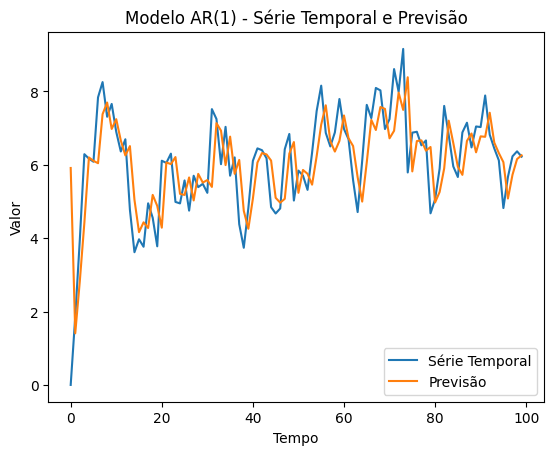

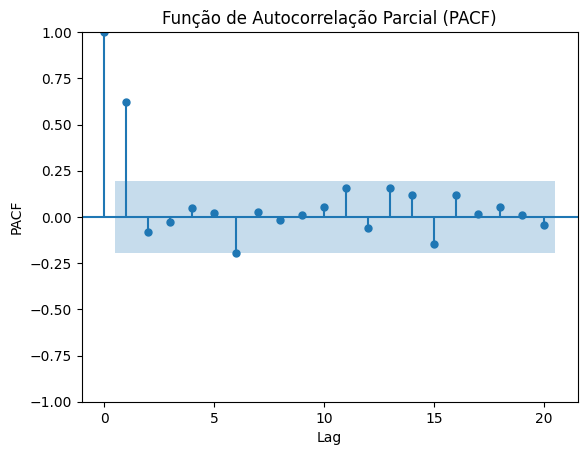

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Simulação de uma série temporal AR(1)
np.random.seed(42)
n = 100
c = 2  # Constante
phi = 0.7  # Coeficiente AR(1)
sigma = 1.0  # Desvio padrão do ruído branco

# Gerar o ruído branco
epsilon = np.random.normal(0, sigma, n)

# Inicializar a série temporal
y = np.zeros(n)

# # Gerar a série temporal MA(1)
# for t in range(1, n):
#     y[t] = mu + theta1 * erro[t-1] + erro[t]

# Gerar a série temporal AR(1)
for t in range(1, n):
    y[t] = c + phi * y[t-1] + epsilon[t]

# Ajustar o modelo AR(1)
model = sm.tsa.ARIMA(y, order=(1, 0, 0))
results = model.fit()

# Resumo do modelo
print(results.summary())

# Gráfico da série temporal e da previsão
plt.plot(y, label='Série Temporal')
plt.plot(results.fittedvalues, label='Previsão')
plt.legend()
plt.title('Modelo AR(1) - Série Temporal e Previsão')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.show()

plot_pacf(y, lags=20, title='Função de Autocorrelação Parcial (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()

## **AR(2)**

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Simulação de uma série temporal AR(2)
np.random.seed(42)
n = 1000
c = 2  # Constante
phi1 = 0.5  # Coeficiente AR(1)
phi2 = 0.3  # Coeficiente AR(2)
sigma = 1.0  # Desvio padrão do ruído branco

# Gerar o ruído branco
epsilon = np.random.normal(0, sigma, n)

# Inicializar a série temporal
y = np.zeros(n)

# # Gerar a série temporal AR(1)
# for t in range(1, n):
#     y[t] = c + phi * y[t-1] + epsilon[t]

# Gerar a série temporal AR(2)
for t in range(2, n):
    y[t] = c + phi1 * y[t-1] + phi2 * y[t-2] + epsilon[t]

# Ajustar o modelo AR(2)
model = sm.tsa.ARIMA(y, order=(2, 0, 0))
results = model.fit()

# Resumo do modelo
print(results.summary())

# # Gráfico da série temporal e da previsão
# # plt.figure(figsize=(12, 6))
# # plt.subplot(121)
# plt.plot(y, label='Série Temporal')
# plt.plot(results.fittedvalues, label='Previsão')
# plt.legend()
# plt.title('Modelo AR(2) - Série Temporal e Previsão')
# plt.xlabel('Tempo')
# plt.ylabel('Valor')
# plt.show()

# # Plot da função de autocorrelação parcial (PACF)
# # plt.subplot(122)
# plot_pacf(y, lags=20, title='Função de Autocorrelação Parcial (PACF)')
# plt.xlabel('Lag')
# plt.ylabel('PACF')

# plt.tight_layout()
# plt.show()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1421.861
Date:                Thu, 05 Oct 2023   AIC                           2851.723
Time:                        00:38:35   BIC                           2871.354
Sample:                             0   HQIC                          2859.184
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9451      0.199     50.075      0.000       9.556      10.334
ar.L1          0.5384      0.028     19.073      0.000       0.483       0.594
ar.L2          0.3092      0.031     10.113      0.0

# **AR(p = 3)**

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Simulação de uma série temporal AR(3)
np.random.seed(42)
n = 100
c = 2  # Constante
phi1 = 0.3  # Coeficiente AR(1)
phi2 = -0.5  # Coeficiente AR(2)
phi3 = 0.6  # Coeficiente AR(3)
sigma = 1.0  # Desvio padrão do ruído branco

# Gerar o ruído branco
epsilon = np.random.normal(0, sigma, n)

# Inicializar a série temporal
y = np.zeros(n)

# Gerar a série temporal AR(3)
for t in range(3, n):
    y[t] = c + phi1 * y[t-1] + phi2 * y[t-2] + phi3 * y[t-3] + epsilon[t]

# Ajustar o modelo AR(3)
model = sm.tsa.ARIMA(y, order=(3, 0, 0))
results = model.fit()

# Resumo do modelo
print(results.summary())

# # Gráfico da série temporal e da previsão
# plt.plot(y, label='Série Temporal')
# plt.plot(results.fittedvalues, label='Previsão')
# plt.legend()
# plt.title('Modelo AR(2) - Série Temporal e Previsão')
# plt.xlabel('Tempo')
# plt.ylabel('Valor')
# plt.show()

# # Plot da função de autocorrelação parcial (PACF)
# plot_pacf(y, lags=20, title='Função de Autocorrelação Parcial (PACF)')
# plt.xlabel('Lag')
# plt.ylabel('PACF')

# plt.tight_layout()
# plt.show()


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -143.145
Date:                Thu, 05 Oct 2023   AIC                            296.289
Time:                        00:39:22   BIC                            309.315
Sample:                             0   HQIC                           301.561
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9151      0.220     13.269      0.000       2.485       3.346
ar.L1          0.3960      0.080      4.961      0.000       0.240       0.552
ar.L2         -0.4588      0.077     -5.989      0.0

Qual é o melhor modelo auto regressivo para a série presente em ar_exercicio.parquet?

# **ARMA(1,1)**

In [ ]:
import numpy as np
import statsmodels.api as sm

# Simulação de dados ARMA(1,1)
np.random.seed(42)
n = 100
phi = 0.7  # Coeficiente autorregressivo
theta = 0.3  # Coeficiente de média móvel
epsilon = np.random.normal(0, 1, n)

y = np.zeros(n)
y[0] = epsilon[0]  # Valor inicial

for t in range(1, n):
    y[t] = phi * y[t-1] + epsilon[t] + theta * epsilon[t-1]

# Ajustar um modelo ARMA(1,1)
model = sm.tsa.ARIMA(y, order=(1, 0, 1))
results = model.fit()

# Resumo do modelo
print(results.summary())

# Gráfico da série temporal e da previsão
plt.plot(y, label='Série Temporal')
plt.plot(results.fittedvalues, label='Previsão')
plt.legend()
plt.title('Modelo ARMA(1,1) - Série Temporal e Previsão')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.show()

# Plot da função de autocorrelação parcial (PACF)
plot_pacf(y, lags=20, title='Função de Autocorrelação Parcial (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF')

plt.tight_layout()
plt.show()


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -132.204
Date:                Mon, 09 Oct 2023   AIC                            272.408
Time:                        22:35:08   BIC                            282.829
Sample:                             0   HQIC                           276.625
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4174      0.355     -1.175      0.240      -1.114       0.279
ar.L1          0.6655      0.098      6.777      0.000       0.473       0.858
ma.L1          0.3136      0.134      2.337      0.0

NameError: ignored

# **ARMA(2,3)**

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(2, 0, 3)   Log Likelihood                -130.080
Date:                Mon, 09 Oct 2023   AIC                            274.159
Time:                        23:07:34   BIC                            292.395
Sample:                             0   HQIC                           281.540
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2354      0.187     -1.262      0.207      -0.601       0.130
ar.L1          0.4330      0.085      5.073      0.000       0.266       0.600
ar.L2         -0.9538      0.087    -10.937      0.0

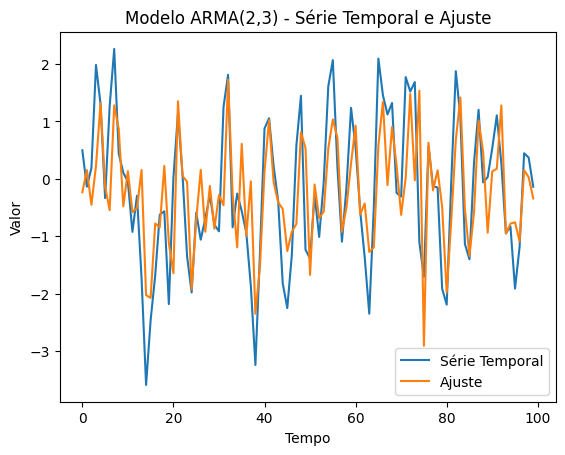

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Simulação de dados ARMA(2,3)
np.random.seed(42)
n = 100
phi1, phi2 = 0.7, -0.2  # Coeficientes autorregressivos
theta1, theta2, theta3 = 0.3, -0.4, 0.1  # Coeficientes de média móvel
epsilon = np.random.normal(0, 1, n)

y = np.zeros(n)
y[0] = epsilon[0]  # Valor inicial
y[1] = epsilon[1]

for t in range(2, n):
    y[t] = phi1 * y[t-1] + phi2 * y[t-2] + epsilon[t] + theta1 * epsilon[t-1] + theta2 * epsilon[t-2] + theta3 * epsilon[t-3]

# Ajustar um modelo ARMA(2,3)
fit = sm.tsa.ARIMA(y, order=(2, 0, 3)).fit()

# Resumo do modelo
print(fit.summary())

# Gráfico da série temporal e da previsão
plt.plot(y, label='Série Temporal')
plt.plot(fit.fittedvalues, label='Ajuste')
plt.legend()
plt.title('Modelo ARMA(2,3) - Série Temporal e Ajuste')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.show()

plt.tight_layout()
plt.show()

#AIC AR(1) 306
#AIC ARMA(1,1) 271.3
#AIC ARMA(2,1) 271.3
#AIC ARMA(2,1) 274.3



**AUTO ARMA**

In [ ]:
from scipy.optimize import brute
import warnings
warnings.filterwarnings("ignore")

def get_aic_arma(order, endog):
    p, q = order
    try:
        fit = sm.tsa.ARIMA(endog, order=(p, 0, q)).fit()
        return fit.aic
    except:
        return np.inf


endog = y
grid = (slice(1, 5, 1), #AR
        slice(1, 5, 1), #MA
        )
p, q = brute(get_aic_arma, grid, args=(endog,), finish=None)

fit = sm.tsa.ARIMA(endog, order=(p, 0, q)).fit()
print(fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1397.745
Date:                Mon, 09 Oct 2023   AIC                           2803.490
Time:                        22:45:00   BIC                           2823.121
Sample:                             0   HQIC                          2810.951
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0383      0.065      0.588      0.556      -0.089       0.166
ar.L1          0.0883      0.035      2.495      0.013       0.019       0.158
ma.L1          0.9074      0.015     58.571      0.0

PREVISÃO

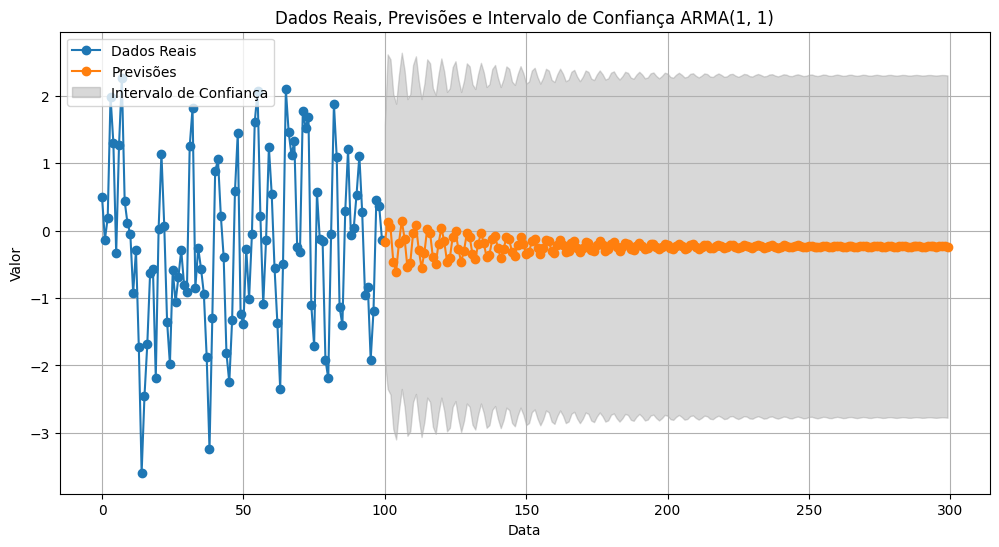

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

num_periods = 200
forecast_complete = fit.get_forecast(steps = num_periods)
forecast_complete.summary_frame()

fore_data = forecast_complete.summary_frame()
fore_data.index = range(100,100+ num_periods)

aux = pd.DataFrame()
aux["y"] = y
combined_df = pd.concat([aux, fore_data])

# Plote os dados combinados
plt.figure(figsize=(12, 6))
plt.plot(combined_df.index, combined_df['y'], label='Dados Reais', marker='o')
plt.plot(combined_df.index[-num_periods:], combined_df['mean'][-num_periods:], label='Previsões', marker='o')
plt.fill_between(combined_df.index[-num_periods:],
                 combined_df['mean_ci_lower'][-num_periods:],
                 combined_df['mean_ci_upper'][-num_periods:],
                 alpha=0.3, label='Intervalo de Confiança', color='gray')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Dados Reais, Previsões e Intervalo de Confiança ARMA(1, 1)')
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

**Exercicio: Obtenha o grafico de previsão de produção de balas para os próximos 50 meses. Use dados em candy_production.csv**

In [ ]:
import pandas as pd
from scipy.optimize import brute
import warnings
warnings.filterwarnings("ignore")

#Definir funcao coletar AIC
def get_aic_arma(order, endog):
    p, q = order
    try:
        fit = sm.tsa.ARIMA(endog, order=(p, 0, q)).fit()
        return fit.aic
    except:
        return np.inf

#Carregar a organizar Candy
candy = pd.read_csv("candy_production.csv")
candy.columns = ["date", "production"]
candy['date'] = pd.to_datetime(candy["date"])
candy.set_index('date', inplace = True)

#Preparar dados para Regressão Séries Temporais
endog = candy['production']
grid = (slice(1, 5, 1), #AR
        slice(1, 5, 1), #MA
        )

#Encontrar melhor modelo ARMA(p,q)
p, q = brute(get_aic_arma, grid, args=(endog,), finish=None)

#Obter e imprimir a regressão com o melhor modelo ARMA(p,q)
fit = sm.tsa.ARIMA(endog, order=(p, 0, q)).fit()
print(fit.summary())

#Melhor modelo é um model ARMA(4,3)

                               SARIMAX Results                                
Dep. Variable:             production   No. Observations:                  548
Model:                 ARIMA(4, 0, 3)   Log Likelihood               -1773.830
Date:                Mon, 09 Oct 2023   AIC                           3565.660
Time:                        23:49:40   BIC                           3604.416
Sample:                    01-01-1972   HQIC                          3580.807
                         - 08-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.4093      6.531     15.374      0.000      87.608     113.210
ar.L1          1.6756      0.016    106.009      0.000       1.645       1.707
ar.L2          0.0569      0.015      3.752      0.0

In [ ]:
print(candy.tail())
print(candy.mean(), candy.std())
forecast_complete.summary_frame()

            production
date                  
2017-04-01    107.4288
2017-05-01    101.9209
2017-06-01    104.2022
2017-07-01    102.5861
2017-08-01    114.0613
production    100.662524
dtype: float64 production    18.052931
dtype: float64


production,mean,mean_se,mean_ci_lower,mean_ci_upper
2017-09-01,114.440415,6.112233,102.460658,126.420172
2017-10-01,118.639922,8.177278,102.612752,134.667091
2017-11-01,116.379465,9.140953,98.463526,134.295404
2017-12-01,117.439417,9.430469,98.956036,135.922797
2018-01-01,112.387168,9.458312,93.849218,130.925119
2018-02-01,111.719194,9.467654,93.162933,130.275456
2018-03-01,106.411309,9.495500,87.800471,125.022147
2018-04-01,106.961859,9.499765,88.342661,125.581056
2018-05-01,103.965205,9.539381,85.268363,122.662047
2018-06-01,107.266247,9.804675,88.049437,126.483057


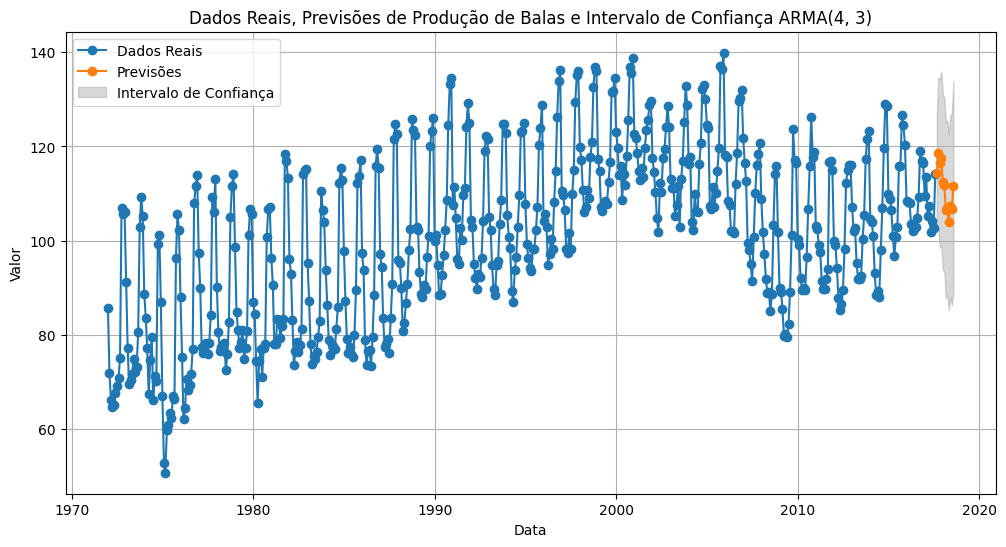

In [ ]:
#Previsão
num_periods = 12

forecast_complete = fit.get_forecast(steps = num_periods)
forecast_complete.summary_frame()

fore_data = forecast_complete.summary_frame()
#fore_data.index = range(100,100+ num_periods)

combined_df = pd.concat([candy['production'], forecast_complete.summary_frame()])

# Plote os dados combinados
plt.figure(figsize=(12, 6))
plt.plot(combined_df.index, combined_df.iloc[:,0], label='Dados Reais', marker='o')
plt.plot(combined_df.index[-num_periods:], combined_df['mean'][-num_periods:], label='Previsões', marker='o')
plt.fill_between(combined_df.index[-num_periods:],
                 combined_df['mean_ci_lower'][-num_periods:],
                 combined_df['mean_ci_upper'][-num_periods:],
                 alpha=0.3, label='Intervalo de Confiança', color='gray')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Dados Reais, Previsões de Produção de Balas e Intervalo de Confiança ARMA(4, 3)')
plt.legend(loc="upper left")
plt.grid(True)
plt.show()


**CAMINHO ALEATÓRIO**

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              2603.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):                    6.73e-73
Time:                        00:20:30   Log-Likelihood:                         -193.74
No. Observations:                 100   AIC:                                      389.5
Df Residuals:                      99   BIC:                                      392.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

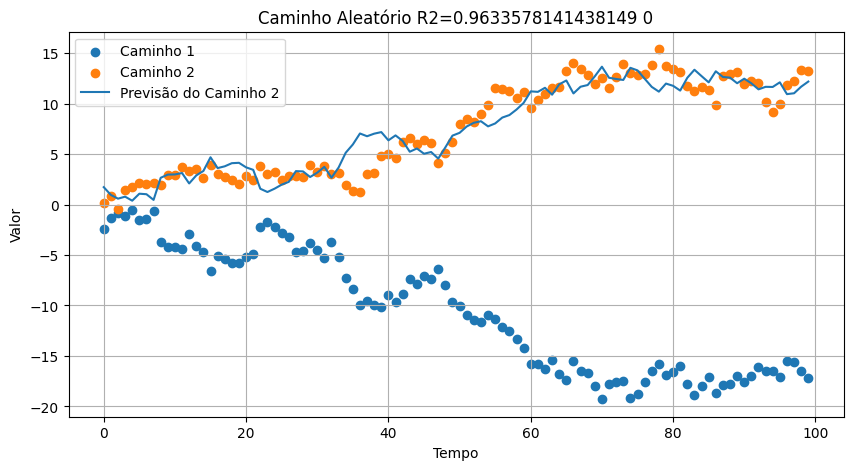

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

r2 = 0
i = 0
while r2<0.95:
  # Defina o número de passos no caminho aleatório
  num_passos = 100

  # Calcule o caminho aleatório acumulado (soma cumulativa dos passos)
  caminho1 = np.cumsum(np.random.randn(num_passos))
  caminho2 = np.cumsum(np.random.randn(num_passos))

  fit = sm.OLS(caminho2,caminho1).fit()
  r2 = fit.rsquared

  # i += 1

# Crie um vetor de tempo (índice) para o caminho aleatório
tempo = np.arange(num_passos)
print(fit.summary())


# Plote o caminho aleatório
plt.figure(figsize=(10, 5))
plt.scatter(tempo, caminho1, label = 'Caminho 1')
plt.scatter(tempo, caminho2, label = 'Caminho 2')
plt.plot(tempo, fit.predict(caminho1), label = 'Previsão do Caminho 2')
plt.title('Caminho Aleatório R2=' + str(r2) +" "+str(i))
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend(loc="upper left")
plt.grid(True)
plt.show()


**SÉRIES COM TENDÊNCIA**

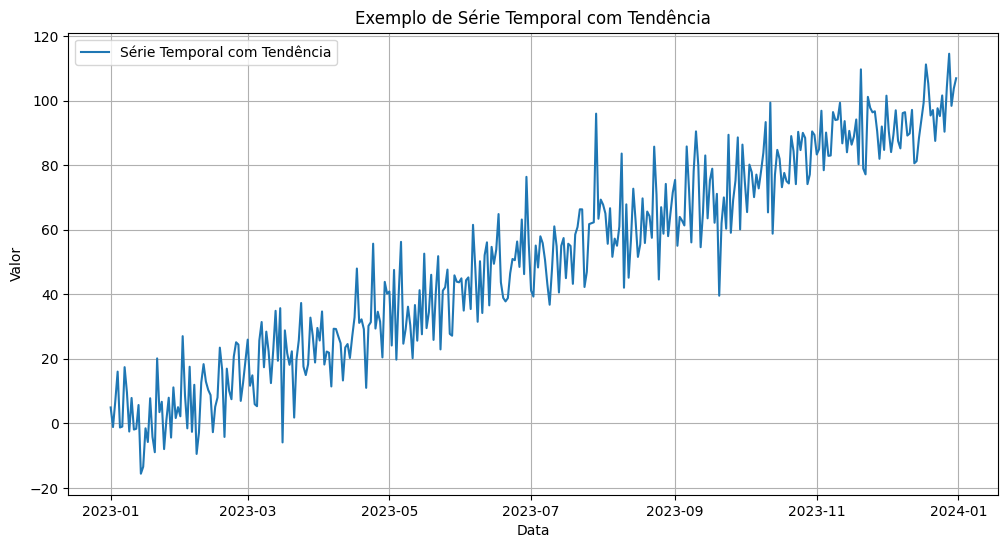

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Criar um índice de datas
date_rng = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')

# Criar uma tendência linear nos dados
tendencia = np.linspace(0, 100, num=len(date_rng))

# Adicionar algum ruído aleatório
np.random.seed(42)
ruido = np.random.normal(0, 10, size=len(date_rng))

# Criar a série temporal com tendência
serie_temporal_com_tendencia = tendencia + ruido

# Criar um DataFrame
df = pd.DataFrame({'Date': date_rng, 'Value': serie_temporal_com_tendencia})

# Plotar a série temporal com tendência
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Value'], label='Série Temporal com Tendência')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Exemplo de Série Temporal com Tendência')
plt.legend()
plt.grid(True)
plt.show()

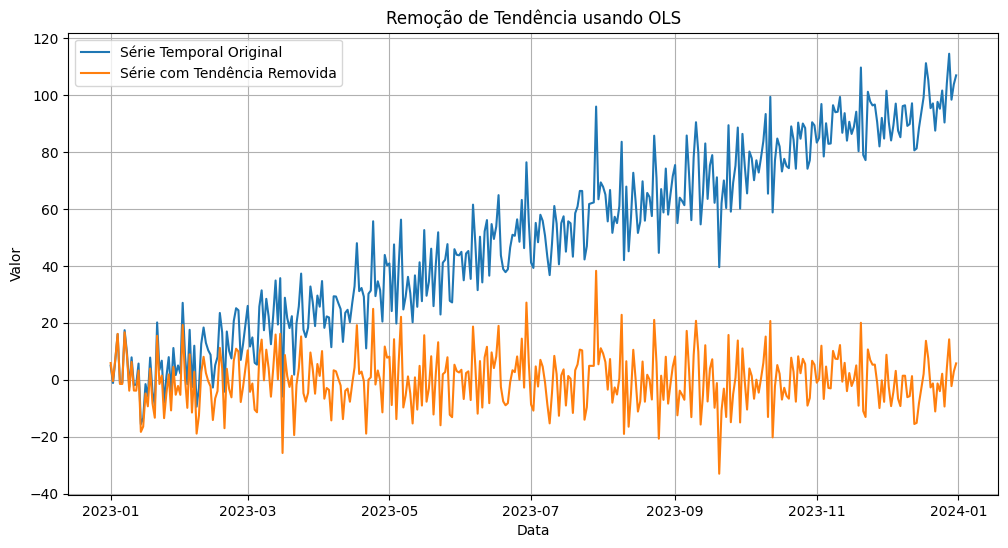

In [ ]:
# Ajustar uma regressão linear (OLS) para remover a tendência
X = sm.add_constant(np.arange(len(df)))  # Adiciona uma coluna constante para representar o termo linear
model = sm.OLS(df['Value'], X).fit()
tendencia_removida = df['Value'] - model.predict(X)

# Plotar a série temporal original e a série com tendência removida
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Value'], label='Série Temporal Original')
plt.plot(df['Date'], tendencia_removida, label='Série com Tendência Removida')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Remoção de Tendência usando OLS')
plt.legend()
plt.grid(True)
plt.show()

**Exercicio: Verifique se o volume de vendas de cupcake em multiTimeline.csv é estacionária.**

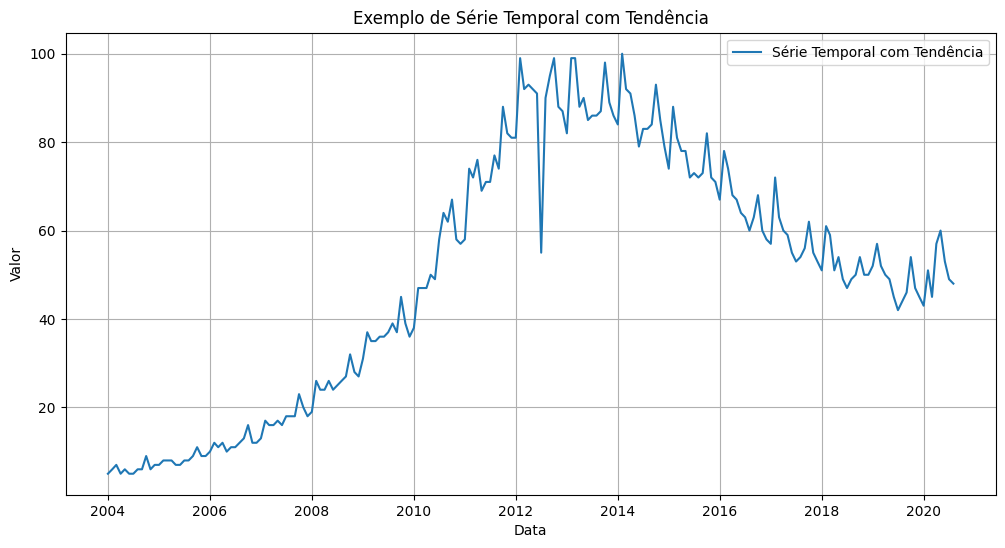

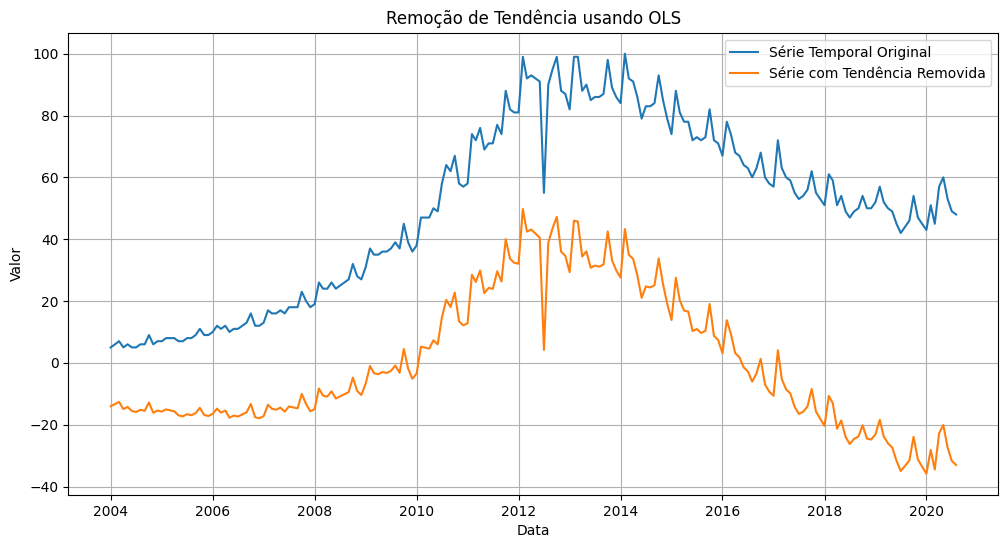

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

cake = pd.read_csv("multiTimeline.csv")

cake["date"] = pd.to_datetime(cake["date"])
cake.set_index('date', inplace = True)

plt.figure(figsize=(12, 6))
plt.plot(cake.index, cake['cupcake'], label='Série Temporal com Tendência')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Exemplo de Série Temporal com Tendência')
plt.legend()
plt.grid(True)
plt.show()

# Ajustar uma regressão linear (OLS) para remover a tendência
X = sm.add_constant(np.arange(len(cake)))  # Adiciona uma coluna constante para representar o termo linear
model = sm.OLS(cake['cupcake'], X).fit()
tendencia_removida = cake['cupcake'] - model.predict(X)

# Plotar a série temporal original e a série com tendência removida
plt.figure(figsize=(12, 6))
plt.plot(cake.index, cake['cupcake'], label='Série Temporal Original')
plt.plot(cake.index, tendencia_removida, label='Série com Tendência Removida')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Remoção de Tendência usando OLS')
plt.legend()
plt.grid(True)
plt.show()

**TESTE ADF**

In [ ]:
# Realizar o teste ADF
result = sm.tsa.adfuller(cake, regression = "ctt")

# Extrair e imprimir o resultado
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f'Estatística ADF: {adf_statistic}')
print(f'Valor-p: {p_value}')
print('Valores Críticos:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

# Verificar o resultado do teste
if p_value < 0.05:
    print('A série é estacionária (rejeita-se a hipótese nula).')
else:
    print('A série não é estacionária (falha em rejeitar a hipótese nula).')

##########
# regression{“c”,”ct”,”ctt”,”n”}
# Constant and trend order to include in regression.
# “c” : constant only (default).
# “ct” : constant and trend.
# “ctt” : constant, and linear and quadratic trend.
# “n” : no constant, no trend.
###################


# sm.tsa.adfuller(cake, regression = "c")

Estatística ADF: -2.331012648873679
Valor-p: 0.6632690751161957
Valores Críticos:
   1%: -4.434868251554696
   5%: -3.8646963220737174
   10%: -3.57320631299232
A série não é estacionária (falha em rejeitar a hipótese nula).


**ARIMA**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Parâmetros do modelo ARIMA(1,1,2)
np.random.seed(0)
n = 1000  # Tamanho da série temporal
phi1 = 0.7  # Coeficiente AR(1)
theta1 = -0.4  # Coeficiente MA(1)
theta2 = 0.1  # Coeficiente MA(2)

epsilon = np.random.normal(0, 1, n)
y = np.zeros(n)
y[0] = epsilon[0]  # Valor inicial
y[1] = epsilon[1]

for t in range(3, n):
    y[t] = phi1 * y[t-1] + epsilon[t] + theta1 * epsilon[t-1] + theta2 * epsilon[t-2]

# Integre os dados diferenciados para obter a série ARIMA(1,1,2)
Y = pd.DataFrame({'Y': np.cumsum(y)})

# Fit an ARMAX(1,1) model
order = (1, 1, 2)  # ARMAX(1,1) order
model = sm.tsa.ARIMA(Y, order=order)
# model = sm.OLS(data['Y'],data['X'])
results = model.fit()
print(results.summary())

# phi1 = 0.7  # Coeficiente AR(1)
# theta1 = -0.4  # Coeficiente MA(1)
# theta2 = 0.1  # Coeficiente MA(2)


                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                 1000
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1402.227
Date:                Wed, 11 Oct 2023   AIC                           2812.454
Time:                        23:00:46   BIC                           2832.081
Sample:                             0   HQIC                          2819.914
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7113      0.053     13.326      0.000       0.607       0.816
ma.L1         -0.4399      0.059     -7.459      0.000      -0.556      -0.324
ma.L2          0.1306      0.040      3.251      0.0

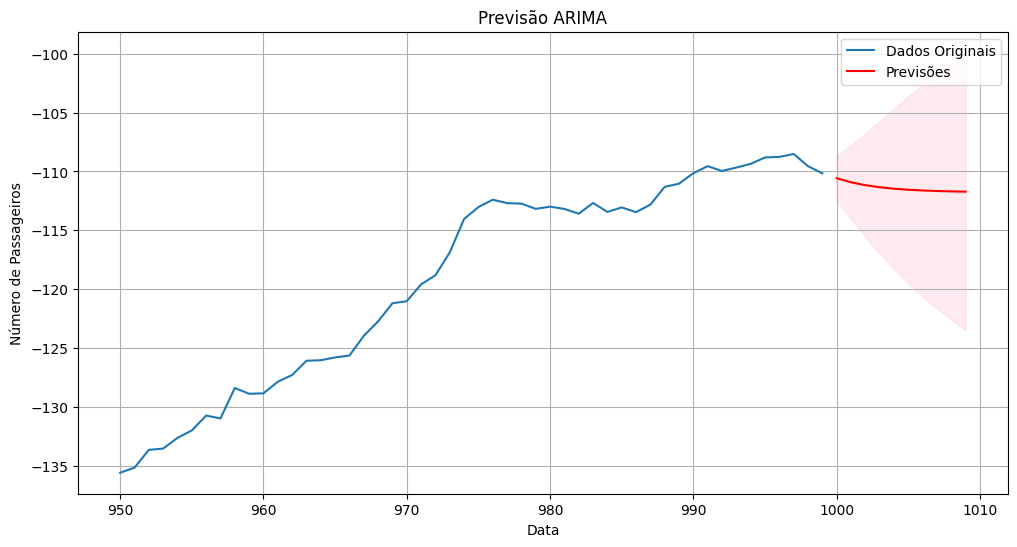

In [ ]:
# Fazer previsões com o modelo ajustado
num_previsoes = 10  # Número de meses a serem previstos
previsoes = results.get_forecast(steps=num_previsoes)

# Extrair as previsões e intervalos de confiança
previsoes_mean = previsoes.predicted_mean
intervalo_confianca = previsoes.conf_int()

# Plotar os dados originais e as previsões
plt.figure(figsize=(12, 6))
plt.plot(Y.tail(50).index, Y['Y'].tail(50), label='Dados Originais')
plt.plot(previsoes_mean.index, previsoes_mean.values, label='Previsões', color='red')
plt.fill_between(intervalo_confianca.index, intervalo_confianca.iloc[:, 0], intervalo_confianca.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Data')
plt.ylabel('Número de Passageiros')
plt.title('Previsão ARIMA')
plt.legend()
plt.grid(True)
plt.show()


Exercicio: Estime o melhor modelo ARIMA para os dados contidos em arima.parquet

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.optimize import brute
import warnings
warnings.filterwarnings("ignore")

def objfunc(order, endog):
    p, d, q = order
    try:
        model = sm.tsa.ARIMA(endog, order=(p, d, q))
        fit = model.fit()
        return fit.aic
    except:
        return np.inf

data = pd.read_parquet("arima.parquet")

endog = data["Y"]

# Defina a grade de valores de parâmetros que deseja avaliar
grid = (slice(0, 2, 1), slice(0, 2, 1), slice(0, 2, 1))  # Aqui estamos considerando valores entre 0 e 5 para p e q, e entre 0 e 2 para d.

# Use a função "brute" para encontrar os melhores parâmetros
result = brute(objfunc, grid, args=(endog,), full_output=True)

# Os melhores parâmetros estão na variável "result"
best_params = result[0]

print("Melhores parâmetros encontrados (p, d, q):", best_params)

Melhores parâmetros encontrados (p, d, q): [1. 1. 1.]


In [ ]:
model = sm.tsa.ARIMA(endog, order=(best_params[0], best_params[1], best_params[2]))
results = model.fit()
print(results.summary())

# # Fazer previsões com o modelo ajustado
# num_previsoes = 10  # Número de meses a serem previstos
# previsoes = results.get_forecast(steps=num_previsoes)

# # Extrair as previsões e intervalos de confiança
# previsoes_mean = previsoes.predicted_mean
# intervalo_confianca = previsoes.conf_int()

# # Plotar os dados originais e as previsões
# plt.figure(figsize=(12, 6))
# plt.plot(data['Y'].index, data['Y'], label='Dados Originais')
# plt.plot(previsoes_mean.index, previsoes_mean.values, label='Previsões', color='red')
# plt.fill_between(intervalo_confianca.index, intervalo_confianca.iloc[:, 0], intervalo_confianca.iloc[:, 1], color='pink', alpha=0.3)
# plt.xlabel('Data')
# plt.ylabel('Y')
# plt.title('Previsão ARIMA')
# plt.legend()
# plt.grid(True)
# plt.show()

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                 1000
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1441.461
Date:                Wed, 11 Oct 2023   AIC                           2888.921
Time:                        23:54:58   BIC                           2903.642
Sample:                             0   HQIC                          2894.516
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9571      0.010     98.387      0.000       0.938       0.976
ma.L1          0.0718      0.032      2.227      0.026       0.009       0.135
sigma2         1.0463      0.046     22.690      0.0

**SARIMA**

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Carregar o conjunto de dados de passageiros de companhias aéreas
data = sm.datasets.get_rdataset('AirPassengers').data

# Converter a coluna 'Month' para o formato de data e indexar
date_int = data.time.astype(int)
data['Month'] = [str(date_int[i]) + "-" + str(1+(12*(data.time[i] - date_int[i])).round().astype(int)) for i in range(len(data.time))]
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')

data.drop(columns=['time'], inplace=True) # deletar colula time

data.set_index('Month', inplace=True) #indexar data por mês

data = np.log(data)

# Ajustar um modelo SARIMA aos dados
model = sm.tsa.SARIMAX(data['value'], order=(0, 0, 0), seasonal_order=(1, 0, 1, 12)) #ARMA (1,1) na sazonalidade 12
results = model.fit()
print(results.summary())

                                 SARIMAX Results                                  
Dep. Variable:                      value   No. Observations:                  144
Model:             SARIMAX(1, 0, [1], 12)   Log Likelihood                  63.139
Date:                    Thu, 12 Oct 2023   AIC                           -120.279
Time:                            00:06:27   BIC                           -111.369
Sample:                        01-01-1949   HQIC                          -116.658
                             - 12-01-1960                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9995      0.001    796.101      0.000       0.997       1.002
ma.S.L12       0.4660      0.089      5.233      0.000       0.291       0.641
sigma2         0.012

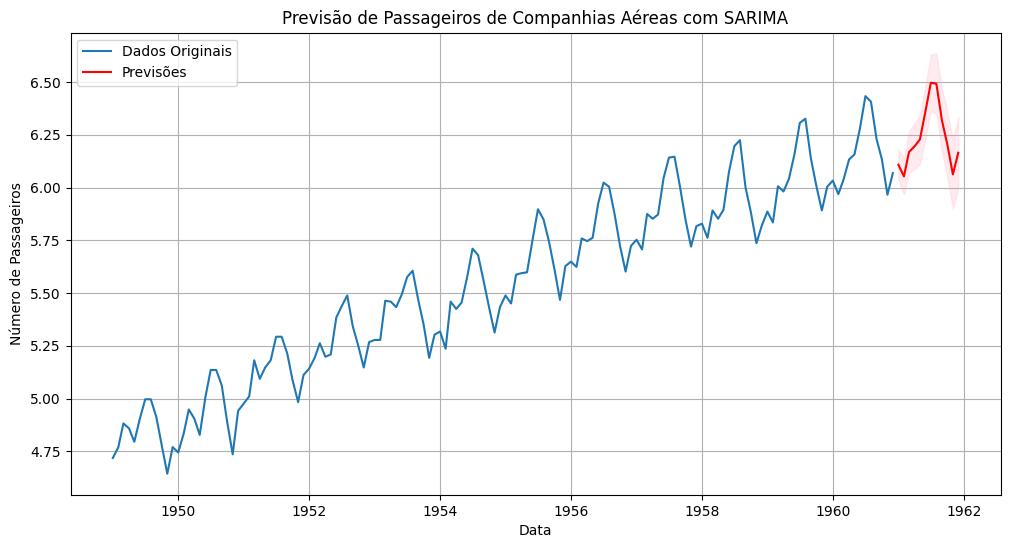

In [ ]:
# Fazer previsões com o modelo ajustado
num_previsoes = 12  # Número de meses a serem previstos
previsoes = results.get_forecast(steps=num_previsoes)

# Extrair as previsões e intervalos de confiança
previsoes_mean = previsoes.predicted_mean
intervalo_confianca = previsoes.conf_int()

# Plotar os dados originais e as previsões
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['value'], label='Dados Originais')
plt.plot(previsoes_mean.index, previsoes_mean.values, label='Previsões', color='red')
plt.fill_between(intervalo_confianca.index, intervalo_confianca.iloc[:, 0], intervalo_confianca.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Data')
plt.ylabel('Número de Passageiros')
plt.title('Previsão de Passageiros de Companhias Aéreas com SARIMA')
plt.legend()
plt.grid(True)
plt.show()

Exercicio: Estime o melhor modelo SARIMA para os dados em AirPassenger

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.optimize import brute
import warnings
warnings.filterwarnings("ignore")

def objfunc(order, endog):
    p, d, q, ps, ds, qs, s = order
    try:
        model = sm.tsa.SARIMAX(endog, order=(p, d, q), seasonal_order=(ps, ds, qs, s))
        fit = model.fit()
        return fit.aic
    except:
        return np.inf

# data = pd.read_parquet("arima.parquet")

endog = data['value']

# Defina a grade de valores de parâmetros que deseja avaliar
grid = (slice(0, 2, 1), slice(0, 2, 1), slice(0, 2, 1), #p , d ,q
        slice(0, 2, 1), slice(0, 2, 1), slice(0, 2, 1), #ps, ds, qs
        slice(9, 15, 3) #s
        )  # Aqui estamos considerando valores entre 0 e 5 para p e q, e entre 0 e 2 para d.

# Use a função "brute" para encontrar os melhores parâmetros
result = brute(objfunc, grid, args=(endog,), full_output=True)

# Os melhores parâmetros estão na variável "result"
best_params = result[0]

print("Melhores parâmetros encontrados (p, d, q)(ps, ds, qs, s):", best_params)

Melhores parâmetros encontrados (p, d, q): [ 0.  1.  1.  1.  0.  1. 12.]


In [ ]:
# Ajustar um modelo SARIMA aos dados
model = sm.tsa.SARIMAX(data['value'], order=(0,1,1), seasonal_order=(1, 0, 1, 12)) #ARMA (1,1) na sazonalidade 12
results = model.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 253.658
Date:                            Thu, 12 Oct 2023   AIC                           -499.316
Time:                                    00:40:04   BIC                           -487.465
Sample:                                01-01-1949   HQIC                          -494.500
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3556      0.070     -5.072      0.000      -0.493      -0.218
ar.S.L12       0.9901      0.007   

SARIMAX

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Generate synthetic data
np.random.seed(0)
n = 300  # Number of data points
time = np.arange(n)
X = np.random.randn(n)  # Exogenous variable
epsilon = np.random.randn(n)  # White noise

# Create an empty array for Y
Y = np.zeros(n)

# Initialize Y[0]
Y[0] = 0.3 * X[0] + epsilon[0]

# Generate the ARMAX(1,1) process
for t in range(1, n):
    Y[t] = 0.6 * Y[t-1] + 0.3 * X[t] + epsilon[t] + 0.3 * epsilon[t-1]

# Create a DataFrame with the data
data = pd.DataFrame({'Y': Y, 'X': X})

# Fit an ARMAX(1,1) model
order = (1, 0, 1)  # ARMAX(1,1) order
model = sm.tsa.ARIMA(data['Y'], exog=data['X'], order=order)
# model = sm.OLS(data['Y'],data['X'])
results = model.fit()

# Display model summary
print(results.summary())


In [ ]:
import matplotlib.pyplot as plt

# # Create ARMAX(1,1) model
# model = sm.tsa.ARMAX(Y[1:], exog=X[1:], order=(1, 0))

# # Fit the model
# results = model.fit()

# Plot the observed and predicted values
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(Y[1:], label='Observed', linestyle='-')
ax.plot(results.predict(start=1, end=n - 1, exog=X[1:]), label='Predicted', linestyle='--', color='red')

# Add labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.set_title('ARMAX(1,1) Model - Observed vs. Predicted')

# Add legend
ax.legend()

# Show the plot
plt.show()


Exercicio: Estime o melhor modelo SARIMAX para os dados contidos em sarima.parquet